In [ ]:
!pip install wordcloud
!pip install apyori

In [4]:
import pandas as pd
import numpy as np

from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS

In [5]:
df = pd.read_csv('Market_Basket_Optimisation.csv',header =None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(df.shape)

(7501, 20)


In [7]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [8]:
# making each customers shopping items an identical list
trans = []
for i in range(0, 7501):
  trans.append([str(df.values[i,j]) for j in range(0, 20)])


In [9]:
trans = np.array(trans)

In [10]:
print(trans.shape)

(7501, 20)


In [11]:
print(trans[1:10])

[['burgers' 'meatballs' 'eggs' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['chutney' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['turkey' 'avocado' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['mineral water' 'milk' 'energy bar' 'whole wheat rice' 'green tea'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan']
 ['low fat yogurt' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['whole wheat pasta' 'french fries' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['soup' 'light cream' 'shallot' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan'
  'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan' 'nan']
 ['frozen vegetab

In [16]:
df[0][0]


'shrimp'

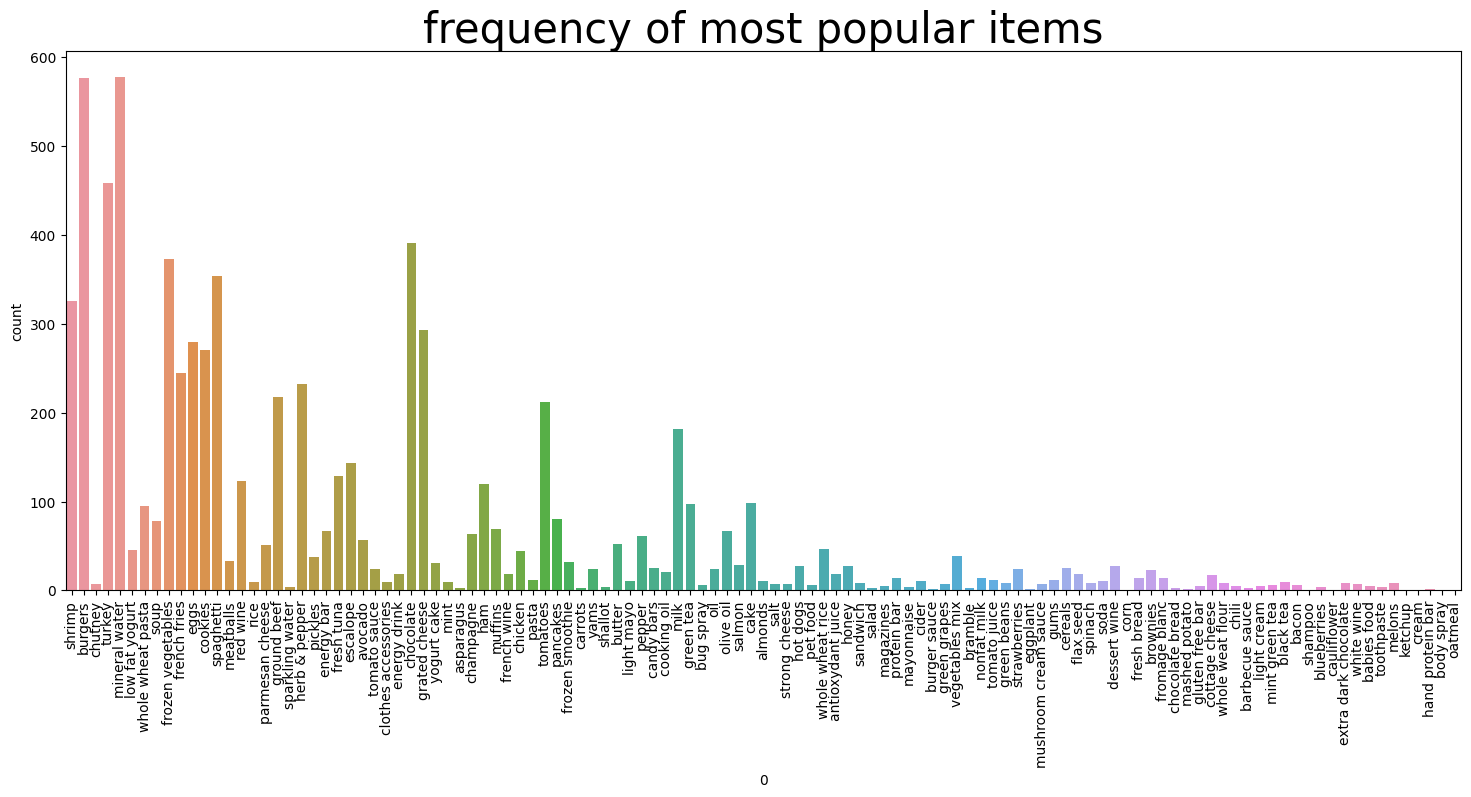

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.countplot(x=df[0])
plt.title('frequency of most popular items', fontsize = 30)
plt.xticks(rotation = 90 )
plt.show()

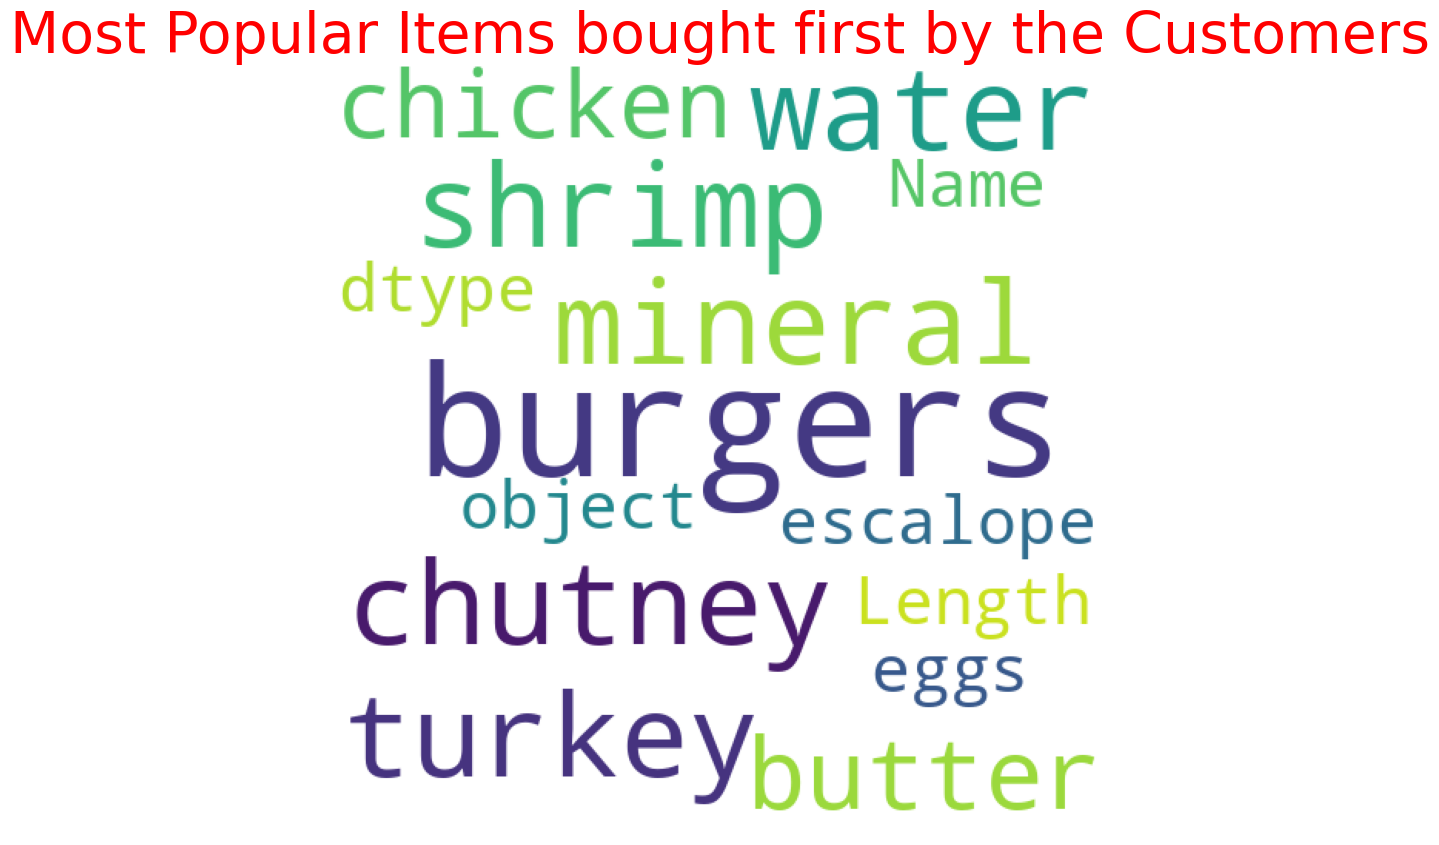

In [28]:
stopwords=set(STOPWORDS)
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color = 'white', width = 500,  height = 500,stopwords=stopwords,min_font_size=10, max_words = 20).generate(str(df[0]))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize=41,color='red')
plt.show()

In [46]:
trans = list(trans)
rules = apriori(trans, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [47]:
results = list(rules)
results[:10]

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [29]:
def inspect(results):
  product1=[tuple(result[2][0][0]) for result in results]
  product2=[tuple(result[2][0][1]) for result in results]
  supports=[result[1] for result in results]
  confidences=[result[2][0][2] for result in results]
  lifts=[result[2][0][3] for result in results]
  return list(zip(product1,product2,supports,confidences,lifts))

In [31]:
df1=pd.DataFrame(inspect(results),columns=["product1","product2","Support","Confidence","Lift"])
df1

,product1,product2,Support,Confidence,Lift
0,"(light cream,)","(chicken,)",0.004533,0.290598,4.843951
1,"(mushroom cream sauce,)","(escalope,)",0.005733,0.300699,3.790833
2,"(pasta,)","(escalope,)",0.005866,0.372881,4.700812
3,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.164271
4,"(herb & pepper,)","(ground beef,)",0.015998,0.323450,3.291994
...,...,...,...,...,...
155,"(olive oil, ground beef)","(spaghetti, nan, mineral water)",0.003066,0.216981,3.632981
156,"(pancakes, ground beef)","(spaghetti, nan, mineral water)",0.003066,0.211009,3.532991
157,"(tomatoes, ground beef)","(spaghetti, nan, mineral water)",0.003066,0.261364,4.376091
158,"(milk, spaghetti, mineral water)","(olive oil, nan)",0.003333,0.211864,3.223519


In [41]:
df1.nlargest(n=10,columns="Lift")

,product1,product2,Support,Confidence,Lift
97,"(frozen vegetables, soup)","(milk, mineral water)",0.003066,0.383333,7.987176
150,"(frozen vegetables, soup)","(milk, nan, mineral water)",0.003066,0.383333,7.987176
96,"(olive oil, frozen vegetables)","(milk, mineral water)",0.003333,0.294118,6.128268
149,"(olive oil, frozen vegetables)","(milk, nan, mineral water)",0.003333,0.294118,6.128268
132,"(mineral water, whole wheat pasta)","(olive oil, nan)",0.003866,0.402778,6.128268
59,"(mineral water, whole wheat pasta)","(olive oil,)",0.003866,0.402778,6.115863
50,"(tomato sauce,)","(spaghetti, ground beef)",0.003066,0.216981,5.535971
122,"(tomato sauce,)","(spaghetti, nan, ground beef)",0.003066,0.216981,5.535971
28,"(fromage blanc,)","(nan, honey)",0.003333,0.245098,5.178818
3,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.164271
